# 探索量子线路

## 准备工作

1. 引入必要的数据处理模块numpy和pandas；
2. 设定matplotlib绘图的风格；
3. 引入QisKit库并打印版本信息。

In [1]:
# Import necessary data-processing modules
import numpy as np
import pandas as pd

# Control matplotlib style (white background)
%matplotlib inline
from matplotlib import style
from IPython.display import display
style.use('seaborn-white')

# Import QisKit
import qiskit
import qiskit.tools.jupyter
%qiskit_version_table

## 准备线路

使用`QuantumCircuit`类定义量子线路，首先定义一个只包含4个量子比特的线路进行分析。

Prepare a quantum circuit with 4 qubits


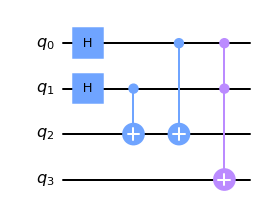

In [2]:
# prepare quantum circuit
circ_q = qiskit.QuantumCircuit(4)
circ_q.h(0)
circ_q.h(1)
circ_q.cx(1, 2)
circ_q.cx(0, 2)
circ_q.ccx(0, 1, 3)

print('Prepare a quantum circuit with 4 qubits')
circ_q.draw()

## 深入查看

量子线路是量子计算的核心元素，是量子算法与实际量子系统的媒介。

QisKit中的`QuantumCircuit`功能非常全面，实现了量子线路所需的各类操作，包括基本的比特管理、门电路、线路的组合，以及线路对应的物理模型等。量子线路的主体组成包括三部分：

1. 量子寄存器（描述量子比特）；
2. 经典寄存器（描述经典比特）；
3. 操作序列。

下面通过`qregs`、`cregs`和`data`打印例子线路的三部分主体信息，这三个成员均为列表类型。

In [3]:
print('Quantum regiters of example circuit:')
print(circ_q.qregs)
print()

print('Classical regiters of example circuit:')
print(circ_q.cregs)
print()

print('Instructions of example circuit:')
print(circ_q.data)

Quantum regiters of example circuit:
[QuantumRegister(4, 'q')]

Classical regiters of example circuit:
[]

Instructions of example circuit:
[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 3)], [])]


编写查看线路信息的函数，显示线路的名称、寄存器和操作序列，绘制线路图。

The input is not Quantum Circuit defined in QisKit
Inspect Quantum Circuit circuit-3

There is no qubit

There is no classic bit

There is no instruction

Image of circuit:


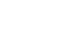


Inspect Quantum Circuit circuit-2

There are 4 qubits in 1 quantum regiters
  QuantumRegister(4, 'q')

There is no classic bit

There are 5 instructions
  (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0)], [])
  (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1)], [])
  (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)], [])
  (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], [])
  (Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 3)], [])

Image of circuit:


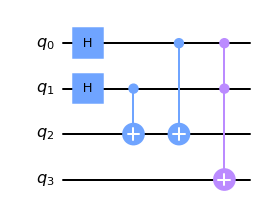

In [4]:
def inspect_quantum_circuit(c):
    if type(c) is not qiskit.circuit.quantumcircuit.QuantumCircuit:
        print('The input is not Quantum Circuit defined in QisKit')
        return
    print('Inspect Quantum Circuit {}'.format(c.name)) # display name
    print()
    if c.num_qubits > 0:
        print('There are {} qubits in {} quantum regiters'.format(c.num_qubits, len(c.qregs)))
        for reg in c.qregs:
            print('  {}'.format(reg)) # display every quantum regiter
    else:
        print('There is no qubit')
    print()
    if c.num_clbits > 0:
        print('There are {} classic bits in {} classic registers'.format(c.num_clbits, len(c.cregs)))
        for reg in c.cregs:
            print('  {}'.format(reg)) # display every classic register
    else:
        print('There is no classic bit')
    print()
    if len(c.data) > 0:
        print('There are {} instructions'.format(len(c.data)))
        for inst in c.data:
            print('  {}'.format(inst)) # display every instruction
    else:
        print('There is no instruction')
    print()
    print('Image of circuit:') # display circuit image
    display(c.draw())
    print()

inspect_quantum_circuit(None)
inspect_quantum_circuit(qiskit.QuantumCircuit())
inspect_quantum_circuit(circ_q)

## 增加测量

目前上面构建的线路只包含量子比特和量子门，不包括测试和经典比特用于输出计算结果。

下面首先构建一个测量后两个量子比特的线路，然后将该电路附加到之前的电路后面，得到完整的可输出结果的电路。

Inspect Quantum Circuit circuit-4

There are 4 qubits in 1 quantum regiters
  QuantumRegister(4, 'q')

There are 2 classic bits in 1 classic registers
  ClassicalRegister(2, 'c')

There are 2 instructions
  (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), [Qubit(QuantumRegister(4, 'q'), 2)], [Clbit(ClassicalRegister(2, 'c'), 0)])
  (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), [Qubit(QuantumRegister(4, 'q'), 3)], [Clbit(ClassicalRegister(2, 'c'), 1)])

Image of circuit:


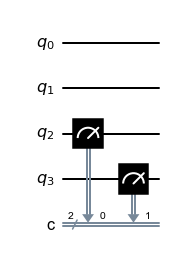

In [5]:
# generate circuit to measure last two qubits
circ_m = qiskit.QuantumCircuit(4, 2)
#circ_m.barrier()
circ_m.measure([2, 3], [0, 1])
inspect_quantum_circuit(circ_m)

compose circuit-2
add barrier before circuit-4
compose circuit-4
Inspect Quantum Circuit circuit-5

There are 4 qubits in 1 quantum regiters
  QuantumRegister(4, 'q0')

There are 2 classic bits in 1 classic registers
  ClassicalRegister(2, 'c0')

There are 8 instructions
  (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q0'), 0)], [])
  (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q0'), 1)], [])
  (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q0'), 1), Qubit(QuantumRegister(4, 'q0'), 2)], [])
  (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q0'), 0), Qubit(QuantumRegister(4, 'q0'), 2)], [])
  (Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q0'), 0), Qubit(QuantumRegister(4, 'q0'), 1), Qubit(QuantumRegister(4, 'q0'), 3)], [])
  (Instruction(name='barrier', num_qubits=4, 

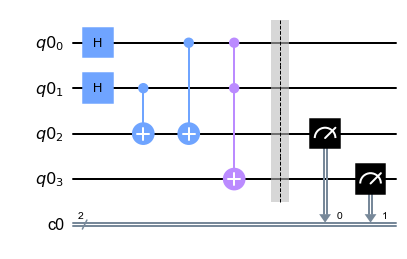

In [6]:
# compose circuits
def compose_circuits(circuits):
    circ = qiskit.QuantumCircuit()
    is_head = True
    for c in circuits:
        if type(c) is not qiskit.circuit.quantumcircuit.QuantumCircuit:
            continue
        if c.num_qubits > circ.num_qubits:
            circ.add_register(qiskit.QuantumRegister(c.num_qubits - circ.num_qubits))
        if c.num_clbits > circ.num_clbits:
            circ.add_register(qiskit.ClassicalRegister(c.num_clbits - circ.num_clbits))
        if is_head:
            is_head = False
        else:
            print('add barrier before {}'.format(c.name))
            circ.barrier()
        print('compose {}'.format(c.name))
        circ.compose(c, inplace = True)
    return circ

circ = compose_circuits([circ_q, circ_m])
inspect_quantum_circuit(circ)

## 初探OpenQasm

OpenQasm是IBM提出的量子计算“汇编”语言，已经得到各大主流量子计算框架的支持，有望成为最终的产业标准。

QisKit中定义的线路与OpenQasm存在一一对应关系，即每个线路都可以导出对应的OpenQasm，也可以通过任意合法的OpenQasm生成对应的线路，这两个功能分别对应`QuantumCircuit`类的`qasm`和`from_qasm_str`（或者`from_qasm_file`）方法，如下所示。

In [7]:
circ_q.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[4];\nh q[0];\nh q[1];\ncx q[1],q[2];\ncx q[0],q[2];\nccx q[0],q[1],q[3];\n'

In [8]:
qasm = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
creg c[2];

h q[0];
h q[1];

cx q[1], q[2];
cx q[0], q[2];
ccx q[0], q[1], q[3];

measure q[2] -> c[0];
measure q[3] -> c[1];
"""

print(qasm)


OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
creg c[2];

h q[0];
h q[1];

cx q[1], q[2];
cx q[0], q[2];
ccx q[0], q[1], q[3];

measure q[2] -> c[0];
measure q[3] -> c[1];



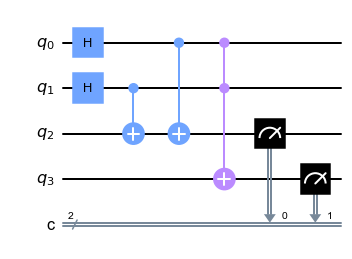

In [9]:
circ = qiskit.QuantumCircuit.from_qasm_str(qasm)
circ.draw()

## 查看帮助

最后，通过`help`函数可以查看`QuantumCircuit`详细的帮助信息。

In [10]:
help(qiskit.QuantumCircuit)

Help on class QuantumCircuit in module qiskit.circuit.quantumcircuit:

class QuantumCircuit(builtins.object)
 |  QuantumCircuit(*regs: Union[qiskit.circuit.register.Register, int, Sequence[qiskit.circuit.bit.Bit]], name: Optional[str] = None, global_phase: Union[qiskit.circuit.parameterexpression.ParameterExpression, float] = 0, metadata: Optional[Dict] = None)
 |  
 |  Create a new circuit.
 |  
 |  A circuit is a list of instructions bound to some registers.
 |  
 |  Args:
 |      regs (list(:class:`Register`) or list(``int``) or list(list(:class:`Bit`))): The
 |          registers to be included in the circuit.
 |  
 |          * If a list of :class:`Register` objects, represents the :class:`QuantumRegister`
 |            and/or :class:`ClassicalRegister` objects to include in the circuit.
 |  
 |            For example:
 |  
 |              * ``QuantumCircuit(QuantumRegister(4))``
 |              * ``QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))``
 |              * ``Qua